# Coporate Project: Credicorp

In [4]:
import pandas as pd
import numpy as np

## Data Cleaning # 1

### Loading the Data

In [2]:
file_path = "base1.txt"

In [3]:
df = pd.read_csv(file_path, delimiter=',')

/var/folders/s1/drf1fvkd2f33nh8092bzmkd40000gn/T/ipykernel_1092/491065432.py:1: DtypeWarning: Columns (2184,2186,2188,2189) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',')


In [4]:
df.head()

,CODMES,LINEA,VENTASOLES,FLG_CEF,FLG_TC,edad_t,FLG_DEPENDIENTE,tipo_empleo,DEF_BURO_12,DEF_BURO_6,...,can_ctd_tmo_CF_prm_u6m,can_ctd_tmo_CF_prm_u9m,can_mto_tmo_CF_prm_u6m_ING,can_tkt_tmo_prm_u12_ING,can_tkt_tmo_ret_prm_u12_ING,can_ctd_tmo_CD_pag_srv_prm_u12,can_ctd_tmo_CD_prm_u12,ctdpdh12meses,ctdpdh24meses,id
0,202208.0,5400.0,NaN,0.0,1.0,48.0,1.0,b'1. Dependiente',0.0,0.0,...,2.333333,2.444444,0.881881,1.259832,0.440002,0.666667,10.000000,3.0,3.0,96.0
1,202208.0,2000.0,15178.0,1.0,0.0,62.0,1.0,b'1. Dependiente',0.0,0.0,...,0.166667,0.111111,0.001445,0.216224,0.000000,2.416667,5.583333,NaN,NaN,141.0
2,202208.0,2500.0,NaN,0.0,1.0,47.0,1.0,b'1. Dependiente',0.0,0.0,...,2.500000,2.666667,0.530264,0.243772,0.217351,2.750000,5.000000,NaN,NaN,232.0
3,202208.0,NaN,250000.0,1.0,0.0,50.0,0.0,b'2. Independiente',0.0,0.0,...,2.833333,3.111111,0.179059,0.879565,0.080424,0.333333,9.500000,NaN,NaN,282.0
4,202208.0,500.0,NaN,0.0,1.0,52.0,1.0,b'1. Dependiente',1.0,0.0,...,19.833333,25.333333,1.623996,0.197779,0.369336,5.083333,13.916667,NaN,NaN,295.0


### Delete Constant Data

In [5]:
constant_columns = df.loc[:, (df.nunique() == 1) & (df.isnull().sum() == 0)].columns

In [6]:
print(constant_columns)

Index(['FLG_VENTANA', 'TIPO_EPS', 'TIPO_COSECHA', 'FLG_CLIENTE'], dtype='object')


In [7]:
df2_cropped = df.drop(columns = constant_columns)

In [8]:
df1_cropped = df2_cropped.drop(columns=['CODMES'])

In [9]:
df1_cropped.head()

,LINEA,VENTASOLES,FLG_CEF,FLG_TC,edad_t,FLG_DEPENDIENTE,tipo_empleo,DEF_BURO_12,DEF_BURO_6,flg_ayuda,...,can_ctd_tmo_CF_prm_u6m,can_ctd_tmo_CF_prm_u9m,can_mto_tmo_CF_prm_u6m_ING,can_tkt_tmo_prm_u12_ING,can_tkt_tmo_ret_prm_u12_ING,can_ctd_tmo_CD_pag_srv_prm_u12,can_ctd_tmo_CD_prm_u12,ctdpdh12meses,ctdpdh24meses,id
0,5400.0,NaN,0.0,1.0,48.0,1.0,b'1. Dependiente',0.0,0.0,0.0,...,2.333333,2.444444,0.881881,1.259832,0.440002,0.666667,10.000000,3.0,3.0,96.0
1,2000.0,15178.0,1.0,0.0,62.0,1.0,b'1. Dependiente',0.0,0.0,0.0,...,0.166667,0.111111,0.001445,0.216224,0.000000,2.416667,5.583333,NaN,NaN,141.0
2,2500.0,NaN,0.0,1.0,47.0,1.0,b'1. Dependiente',0.0,0.0,0.0,...,2.500000,2.666667,0.530264,0.243772,0.217351,2.750000,5.000000,NaN,NaN,232.0
3,NaN,250000.0,1.0,0.0,50.0,0.0,b'2. Independiente',0.0,0.0,0.0,...,2.833333,3.111111,0.179059,0.879565,0.080424,0.333333,9.500000,NaN,NaN,282.0
4,500.0,NaN,0.0,1.0,52.0,1.0,b'1. Dependiente',1.0,0.0,0.0,...,19.833333,25.333333,1.623996,0.197779,0.369336,5.083333,13.916667,NaN,NaN,295.0


### Data Types

In [10]:
data_types = df1_cropped.dtypes

In [11]:
data_type_counts = data_types.value_counts()

In [12]:
summary_table = pd.DataFrame({'data_type': data_type_counts.index, 'count': data_type_counts.values})

In [13]:
print(summary_table)

  data_type  count
0   float64   2218
1    object     38


### Saved Data (Deleted Constants)

In [14]:
df1_cropped.to_parquet('dbforobjects.parquet', engine='pyarrow')

### Target Column

In [3]:
df5=pd.read_parquet('dbforobjects.parquet', engine='pyarrow')

In [4]:
df5['mto_deuda_sol']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
357190   NaN
357191   NaN
357192   NaN
357193   NaN
357194   NaN
Name: mto_deuda_sol, Length: 357195, dtype: float64

In [5]:
df5['mto_deuda_dol']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
357190   NaN
357191   NaN
357192   NaN
357193   NaN
357194   NaN
Name: mto_deuda_dol, Length: 357195, dtype: float64

In [6]:
df5['mtoingresoclustercalculad']

0           716.0
1          3114.0
2          3866.0
3         15146.0
4          3213.0
           ...   
357190        NaN
357191        NaN
357192     5640.0
357193     1322.0
357194        NaN
Name: mtoingresoclustercalculad, Length: 357195, dtype: float64

In [7]:
columns_to_fill=['mto_deuda_sol','mto_deuda_dol','mtoingresoclustercalculad']
df5[columns_to_fill] = df5[columns_to_fill].fillna(0)

In [8]:
denominator = df5['mto_deuda_sol'] + (df5['mto_deuda_dol'] * 3.75)
df5['mtoingresoclustercalculad'].replace(0, 1, inplace=True)
denominator.replace(0, 1, inplace=True)
df5['FH'] = df5['mtoingresoclustercalculad'] / denominator

In [9]:
df5['FH'].head(100)

0       716.0
1      3114.0
2      3866.0
3     15146.0
4      3213.0
       ...   
95    11888.0
96     6000.0
97     4625.0
98     2039.0
99     3670.0
Name: FH, Length: 100, dtype: float64

In [10]:
df6 = df5.drop(columns=columns_to_fill)

In [11]:
df4 = df6.select_dtypes(include=['float'])

In [12]:
df4.head()

,LINEA,VENTASOLES,FLG_CEF,FLG_TC,edad_t,FLG_DEPENDIENTE,DEF_BURO_12,DEF_BURO_6,flg_ayuda,FLG_SEG_ESS,...,can_ctd_tmo_CF_prm_u9m,can_mto_tmo_CF_prm_u6m_ING,can_tkt_tmo_prm_u12_ING,can_tkt_tmo_ret_prm_u12_ING,can_ctd_tmo_CD_pag_srv_prm_u12,can_ctd_tmo_CD_prm_u12,ctdpdh12meses,ctdpdh24meses,id,FH
0,5400.0,NaN,0.0,1.0,48.0,1.0,0.0,0.0,0.0,1.0,...,2.444444,0.881881,1.259832,0.440002,0.666667,10.000000,3.0,3.0,96.0,716.0
1,2000.0,15178.0,1.0,0.0,62.0,1.0,0.0,0.0,0.0,1.0,...,0.111111,0.001445,0.216224,0.000000,2.416667,5.583333,NaN,NaN,141.0,3114.0
2,2500.0,NaN,0.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,...,2.666667,0.530264,0.243772,0.217351,2.750000,5.000000,NaN,NaN,232.0,3866.0
3,NaN,250000.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,...,3.111111,0.179059,0.879565,0.080424,0.333333,9.500000,NaN,NaN,282.0,15146.0
4,500.0,NaN,0.0,1.0,52.0,1.0,1.0,0.0,0.0,1.0,...,25.333333,1.623996,0.197779,0.369336,5.083333,13.916667,NaN,NaN,295.0,3213.0


In [13]:
data_types = df4.dtypes

In [14]:
data_type_counts = data_types.value_counts()

In [15]:
summary_table = pd.DataFrame({'data_type': data_type_counts.index, 'count': data_type_counts.values})

In [16]:
print(summary_table)

  data_type  count
0   float64   2216


### Saved Data (Target Column Only floats)

In [17]:
df4.to_parquet('targetcolumn.parquet', engine='pyarrow')

## Scaling Data

### Standard Scaler

In [2]:
df4=pd.read_parquet('targetcolumn.parquet', engine='pyarrow')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
df4_scaled = scaler.fit_transform(df4)

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [5]:
df4_scaled = pd.DataFrame(df4_scaled, columns=df4.columns)

In [6]:
df4_scaled.head()

,LINEA,VENTASOLES,FLG_CEF,FLG_TC,edad_t,FLG_DEPENDIENTE,DEF_BURO_12,DEF_BURO_6,flg_ayuda,FLG_SEG_ESS,...,can_ctd_tmo_CF_prm_u9m,can_mto_tmo_CF_prm_u6m_ING,can_tkt_tmo_prm_u12_ING,can_tkt_tmo_ret_prm_u12_ING,can_ctd_tmo_CD_pag_srv_prm_u12,can_ctd_tmo_CD_prm_u12,ctdpdh12meses,ctdpdh24meses,id,FH
0,-0.287389,NaN,-0.843115,0.843115,0.689043,0.607447,-0.403702,-0.245401,-0.190431,0.608722,...,-0.122206,-0.053447,0.105317,-0.004070,-0.414531,-0.124550,-1.60229,-1.445843,-1.539635,-0.492055
1,-0.563439,-0.395011,1.186077,-1.186077,1.931559,0.607447,-0.403702,-0.245401,-0.190431,0.608722,...,-0.221223,-0.077602,-0.133477,-0.147938,-0.055137,-0.407562,NaN,NaN,-1.539596,-0.122627
2,-0.522843,NaN,-0.843115,0.843115,0.600292,0.607447,-0.403702,-0.245401,-0.190431,0.608722,...,-0.112776,-0.063094,-0.127174,-0.076871,0.013319,-0.444941,NaN,NaN,-1.539516,-0.006776
3,NaN,6.302338,1.186077,-1.186077,0.866545,-1.646234,-0.403702,-0.245401,-0.190431,-1.642785,...,-0.093916,-0.072729,0.018306,-0.121642,-0.482987,-0.156589,NaN,NaN,-1.539473,1.730983
4,-0.685225,NaN,-0.843115,0.843115,1.044048,0.607447,2.477077,-0.245401,-0.190431,0.608722,...,0.849103,-0.033086,-0.137697,-0.027176,0.492511,0.126422,NaN,NaN,-1.539461,-0.107375


### Saved Data (Scaled + TC + Only Floats)

In [7]:
df4_scaled.to_parquet('scaled.parquet', engine='pyarrow')

## Imputation of Nulls

### Finding Nulls

In [8]:
df4_scaled=pd.read_parquet('scaled.parquet', engine='pyarrow')

In [9]:
null_percentages = df4_scaled.isnull().mean() * 100

In [10]:
group1 = null_percentages[null_percentages < 10].index.tolist()
group2 = null_percentages[(null_percentages >= 10) & (null_percentages < 40)].index.tolist()
group3 = null_percentages[(null_percentages >= 40) & (null_percentages < 70)].index.tolist()
group4 = null_percentages[null_percentages >= 70].index.tolist()

In [11]:
print(f"Group 1 (less than 10% nulls): {len(group1)} columns")
print(f"Group 2 (between 10% and 40% nulls): {len(group2)} columns")
print(f"Group 3 (between 40% and 70% nulls): {len(group3)} columns")
print(f"Group 4 (more than 70% nulls): {len(group4)} columns")

Group 1 (less than 10% nulls): 1498 columns
Group 2 (between 10% and 40% nulls): 486 columns
Group 3 (between 40% and 70% nulls): 152 columns
Group 4 (more than 70% nulls): 80 columns


### Group 1 Imputation on Mean

In [12]:
for col in group1:
    df4_scaled[col].fillna(df4_scaled[col].mean(), inplace=True)  # Mean imputation for numerical data

In [13]:
df4_scaled[group1]

,FLG_CEF,FLG_TC,edad_t,FLG_DEPENDIENTE,DEF_BURO_12,DEF_BURO_6,flg_ayuda,FLG_SEG_ESS,grf_ctd_cli_bca_per_max_u1,grf_ctd_cli_tip_clas_rie_89,...,can_ctd_tmo_CF_prm_u12,can_ctd_tmo_CF_prm_u6m,can_ctd_tmo_CF_prm_u9m,can_mto_tmo_CF_prm_u6m_ING,can_tkt_tmo_prm_u12_ING,can_tkt_tmo_ret_prm_u12_ING,can_ctd_tmo_CD_pag_srv_prm_u12,can_ctd_tmo_CD_prm_u12,id,FH
0,-0.843115,0.843115,0.689043,6.074470e-01,-0.403702,-0.245401,-0.190431,0.608722,-0.296181,0.769018,...,-0.078725,-0.145999,-0.122206,-5.344661e-02,1.053171e-01,-4.070003e-03,-0.414531,-0.124550,-1.539635,-0.492055
1,1.186077,-1.186077,1.931559,6.074470e-01,-0.403702,-0.245401,-0.190431,0.608722,-0.076575,0.988075,...,-0.211145,-0.248341,-0.221223,-7.760241e-02,-1.334769e-01,-1.479380e-01,-0.055137,-0.407562,-1.539596,-0.122627
2,-0.843115,0.843115,0.600292,6.074470e-01,-0.403702,-0.245401,-0.190431,0.608722,-0.259580,0.111848,...,-0.102492,-0.138127,-0.112776,-6.309364e-02,-1.271736e-01,-7.687061e-02,0.013319,-0.444941,-1.539516,-0.006776
3,1.186077,-1.186077,0.866545,-1.646234e+00,-0.403702,-0.245401,-0.190431,-1.642785,-0.351082,-1.421550,...,-0.099097,-0.122382,-0.093916,-7.272935e-02,1.830582e-02,-1.216418e-01,-0.482987,-0.156589,-1.539473,1.730983
4,-0.843115,0.843115,1.044048,6.074470e-01,2.477077,-0.245401,-0.190431,0.608722,-0.149777,-0.764379,...,0.817658,0.680610,0.849103,-3.308578e-02,-1.376974e-01,-2.717568e-02,0.492511,0.126422,-1.539461,-0.107375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357190,-0.843115,0.843115,-0.553473,5.699397e-17,-0.403702,-0.245401,-0.190431,-1.642785,0.197932,0.111848,...,-0.194168,-0.216851,-0.202363,-1.894400e-17,-4.145035e-17,-1.447949e-18,0.235801,-0.279406,2.030086,-0.602205
357191,-0.843115,0.843115,-1.085980,5.699397e-17,-0.403702,-0.245401,-0.190431,0.608722,2.558692,1.207132,...,-0.010817,0.050812,0.009816,-1.894400e-17,-4.145035e-17,-1.447949e-18,-0.551443,-0.530379,2.030721,-0.602205
357192,-0.843115,0.843115,-0.287220,5.699397e-17,2.477077,-0.245401,5.251247,-1.642785,-0.332782,-1.421550,...,0.040114,0.184644,0.089973,-6.148515e-02,-1.078058e-01,-1.204314e-01,-0.551443,-0.530379,2.031041,0.266520
357193,-0.843115,0.843115,-0.287220,5.699397e-17,-0.403702,-0.245401,-0.190431,-1.642785,-0.058275,-0.983436,...,-0.187377,-0.232596,-0.211793,-7.614399e-02,-3.033791e-02,-1.317952e-01,-0.397417,-0.578437,2.031433,-0.398697


### Group 2 Imputation on Median

In [14]:
for col in group2:
    median_value = df4_scaled[col].median()
    df4_scaled[col].fillna(median_value, inplace=True)

In [15]:
df4_scaled[group2]

,LINEA,N_SEG_SALUD,grf_ctd_prov_tip_clas_rie101,grf_ctd_cli_def_prm_u9m,grf_pct_tip_clas_rie_sbs_11,grf_pct_tip_clas_rie_sbs_14,grf_pct_tip_clas_rie_sbs_15,grf_pct_tip_clas_rie_sbs_16,grf_pct_tip_clas_rie_sbs_47,grf_pct_tip_clas_rie_sbs_48,...,can_tkt_tmo_ven_prm_u9m,can_flg_tmo_bmo_max_u12,can_tkt_tmo_bmo_max_u12,can_tkt_tmo_bmo_pag_srv_p4,can_tkt_tmo_bmo_prm_u12,can_tkt_tmo_bmo_prm_u9m,can_tkt_tmo_bmo_trf_max_u1,can_tkt_tmo_bmo_trf_max_u4,can_tkt_tmo_bmo_trf_prm_u1,can_tkt_tmo_bmo_trf_prm_u4
0,-0.287389,0.0,-0.212298,-0.207544,3.505622,3.775069,3.241589,-0.052086,0.364139,0.098383,...,-0.162243,0.194214,-0.216838,-0.227951,-0.256787,-0.249122,-0.237891,-0.222707,-0.264789,-0.257742
1,-0.563439,0.0,-0.105519,-0.184957,0.845428,0.995073,1.101592,1.122744,-0.170967,-0.185142,...,-0.128808,0.194214,0.515303,-0.169960,0.129820,-0.207140,1.211897,0.610107,0.813017,0.163921
2,-0.522843,0.0,-0.195871,-0.218838,0.313389,0.439073,0.198692,0.551208,-0.541424,-0.605993,...,-0.169379,0.194214,-0.427237,-0.192024,-0.692258,-0.647222,-0.449276,-0.400113,-0.655526,-0.601701
3,-0.352342,0.0,-0.319077,-0.196251,-0.177725,-0.196356,-0.176077,-0.185448,-1.107400,-1.192978,...,-0.128808,0.194214,1.831578,-0.417347,6.067154,6.049284,0.113383,0.195186,0.668653,0.482293
4,-0.685225,0.0,-0.286222,-0.196251,-0.750688,-0.672925,-0.431442,-0.877647,-1.078312,-1.139615,...,-0.144420,0.194214,-0.449607,-0.265201,-0.713014,-0.680104,-0.475736,-0.446542,-0.679686,-0.642728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357190,-0.563439,0.0,-0.204085,-0.218838,-0.750688,-0.803746,-0.613159,-0.478841,-0.681744,-0.819440,...,-0.128808,0.194214,-0.338992,-0.165268,-0.531801,-0.549273,-0.343171,-0.373643,-0.420479,-0.428337
357191,-0.563439,0.0,0.009473,0.775000,-1.001928,-0.935479,-0.527228,-0.433304,-0.129806,-0.335083,...,-0.128808,0.194214,-0.449130,-0.417347,-0.777844,-0.709670,-0.481167,-0.433854,-0.761441,-0.690492
357192,1.222763,0.0,-0.097306,-0.196251,-0.177725,-0.196356,-0.176077,-0.185448,-0.316905,-0.499273,...,-0.136686,0.194214,0.130914,-0.417347,0.333757,0.650359,0.241882,0.331140,-0.037978,0.190808
357193,-0.303627,0.0,0.321596,-0.196251,-0.294657,-0.196356,-0.998035,-0.185448,-0.757033,-0.371203,...,-0.168720,0.194214,-0.080882,-0.395999,0.125631,0.225164,-0.020193,0.053861,0.327107,0.421998


### Group 3 Imputation on Mode

In [16]:
for col in group3:
    mode_value = df4_scaled[col].mode()[0] if not df4_scaled[col].mode().empty else np.nan
    df4_scaled[col].fillna(mode_value, inplace=True)

In [17]:
df4_scaled[group3]

,VENTASOLES,rcc_pct_utl_lin_con_tcr_b7,rcc_pct_utl_lin_con_tcr_b9,rcc_pct_utl_lin_con_tcr_b10,exp_ctd_cta_con_max_u24,exp_ctd_diamora_con_frq_01,exp_ctd_diamora_con_frq_02,exp_ctd_diamora_con_frq_61,exp_ctd_diamora_con_frq_62,exp_ctd_diamora_con_max_33,...,exp_mto_sldbal_rev_max_u6_UTL,exp_mto_sldbal_tcr_max_u1_UTL,exp_mto_sldbal_tcr_max_u2_UTL,exp_mto_sldbal_tcr_max_u6_UTL,exp_mto_sldbal_tcr_med_u1_UTL,exp_mto_sldbal_tcr_med_u2_UTL,exp_mto_sldbal_tcr_med_u6_UTL,exp_mto_sldbal_tcr_min_u6_UTL,ctdpdh12meses,ctdpdh24meses
0,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,-1.602290,-1.445843
1,-0.395011,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,0.652491,0.863274
2,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,0.652491,0.863274
3,6.302338,1.302959,1.282838,1.287304,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.244910,-0.354421,-0.486057,-0.289654,1.236258,1.155045,1.017810,1.981857,0.652491,0.863274
4,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,0.652491,0.863274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357190,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,-2.103353,-1.665759
357191,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,0.652491,0.863274
357192,-0.685297,0.236926,0.244924,0.215506,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.250643,-0.361088,-0.492717,-0.296479,0.191335,0.180065,0.111079,1.164449,0.652491,0.863274
357193,-0.685297,-0.916437,-0.897247,-0.910417,-0.519757,-0.249891,-0.255716,-0.023604,-0.030053,-0.109579,...,-0.984646,-1.214764,-1.345401,-1.170227,-0.988627,-1.045532,-0.987531,-0.553331,0.652491,0.863274


### Group 4 to move to boolean

In [18]:
for col in group4:
    df4_scaled[col] = df4_scaled[col].notnull().astype(int)

In [19]:
df4_scaled[group4]

,ads_ctd_mes_opdisp_ult_ds,ads_ctd_opdisp_frq_u12,ads_mto_propdisp_max_u24,ads_mto_propdisp_prm_u24,exp_ctd_diamora_con_pri_d1,exp_ctd_diamora_con_pri_d2,exp_ctd_diamora_con_pri_d3,ctdtx_entrada_r_rcc_4_pri1,pllchf_ctd_pas_u12m,poll_tkt_tc_u12m,...,ctd_ent_acreed_5,ctd_ent_acreed_99,max_num_dias,mto_max_deuda_dol,mto_max_deuda_sol,mto_max_deuda_sol_1,mto_max_deuda_sol_3,mto_max_deuda_sol_4,num_doc_morosos,FLG_POCO_CONOCIDO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357190,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
357191,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
357192,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Counting Nulls to make sure

In [20]:
columns_with_nulls = df4_scaled.columns[df4_scaled.isnull().any()].tolist()
columns_without_nulls = df4_scaled.columns[~df4_scaled.isnull().any()].tolist()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Columns_with_Nulls': [len(columns_with_nulls)],
    'Columns_without_Nulls': [len(columns_without_nulls)]
})

In [21]:
print(summary_df)

   Columns_with_Nulls  Columns_without_Nulls
0                   0                   2216


### Saved Data (Not Nulled + Scaled + TC + Only Floats)

In [22]:
df4_scaled.to_parquet('notnulled.parquet', engine='pyarrow')

## XGB Regressor

In [1]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [4]:
df3 = pd.read_parquet('scaled.parquet', engine='pyarrow')

In [5]:
df2 = df3.dropna(subset=['FH'])

In [6]:
X = df2.drop(columns=['FH'])
y = df2['FH']

In [7]:
model = XGBRegressor(n_estimators=100, random_state=42, missing=np.nan, n_jobs=-1)

In [8]:
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [9]:
importances = model.feature_importances_

In [10]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [11]:
sorted_features = feature_importances.sort_values(by='importance', ascending=False)

In [12]:
sorted_features.head(20)

,feature,importance
957,exp_mto_sldbal_con_med_u6,0.131880
2148,ctd_ent_acreed,0.106991
79,pctcoeficienteendeudamien,0.078398
637,rcc_mto_deu_dir_ind_max_u3,0.047664
407,rcc_mto_sld_vig_max_u6m,0.044650
77,mtocemclisol,0.037669
1922,pos_mto_igcletmxmtop02r_m3,0.036656
1150,isav_tkt_opea_ncts_min_u1,0.030757
197,rcc_mto_sld_con_bm_max_u9,0.026772
1359,prod_antmin_tot_prm_u12,0.022322


In [13]:
sorted_features.to_csv('sortedXGBRegSCA.csv')

In [15]:
with open('xgbregressionscaled.pkl', 'wb') as f:
    pickle.dump(model, f)

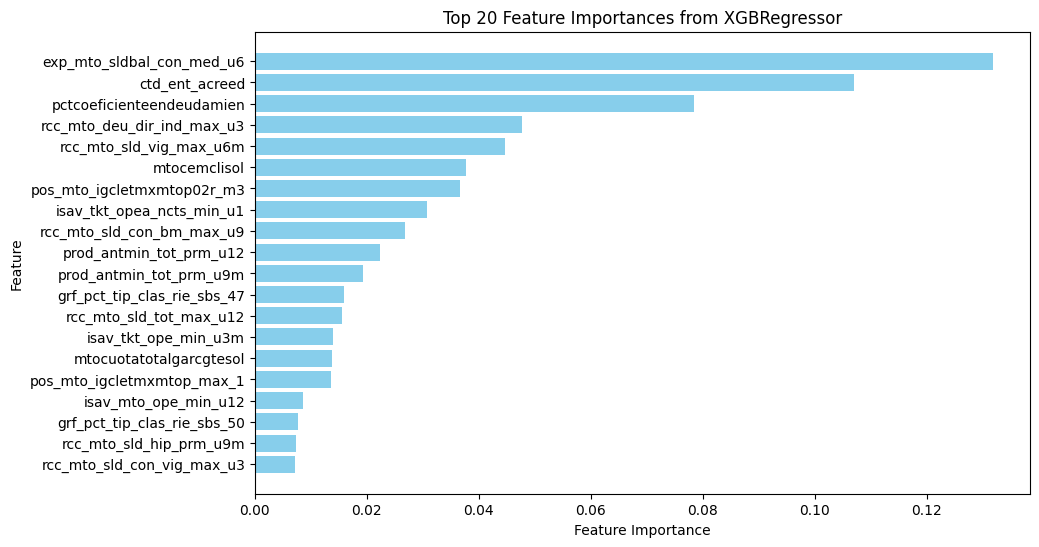

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('sortedXGBRegSCA.csv')

# Assuming the CSV has columns 'feature' and 'importance'
# Sort the DataFrame by importance in descending order
df = df.sort_values(by="importance", ascending=False)

# Select the top 20 features
top_n = 20
top_features = df.head(top_n)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from XGBRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

## KNN No TV

### 2 Cluster 30%

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
num_rows = int(len(df) * 0.3)
random_indices = np.random.choice(df.index, size=num_rows, replace=False)
shuffled_df = df.loc[random_indices].sample(frac=1).reset_index(drop=True)
new_df = shuffled_df

print(new_df)

           LINEA  VENTASOLES   FLG_CEF    FLG_TC    edad_t  FLG_DEPENDIENTE  \
0      -0.563439   -0.685297 -0.843115  0.843115 -0.730975        -1.646234   
1       0.492044   -0.685297 -0.843115  0.843115 -0.464722         0.607447   
2      -0.352342   -0.485651  1.186077 -1.186077 -0.198468         0.607447   
3      -0.352342    1.464182  1.186077 -1.186077 -0.908478         0.607447   
4       1.709910   -0.685297 -0.843115  0.843115  1.132799         0.607447   
...          ...         ...       ...       ...       ...              ...   
107153 -0.644630   -0.685297 -0.843115  0.843115  1.487804        -1.646234   
107154 -0.352342    0.341457  1.186077 -1.186077 -0.464722         0.607447   
107155 -0.352342    1.596379  1.186077 -1.186077  0.777794         0.607447   
107156 -0.382155   -0.685297 -0.843115  0.843115  1.487804         0.607447   
107157  0.086089   -0.685297 -0.843115  0.843115  2.375315         0.607447   

        DEF_BURO_12  DEF_BURO_6  flg_ayuda  FLG_SEG

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)  # adjust n_clusters and random_state as needed
kmeans2.fit(new_df)

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [ ]:
import pickle

In [ ]:
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans2, f)

In [ ]:
labels = kmeans2.labels_
centroids = kmeans2.cluster_centers_

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA

/var/folders/s1/drf1fvkd2f33nh8092bzmkd40000gn/T/ipykernel_4724/3927894718.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


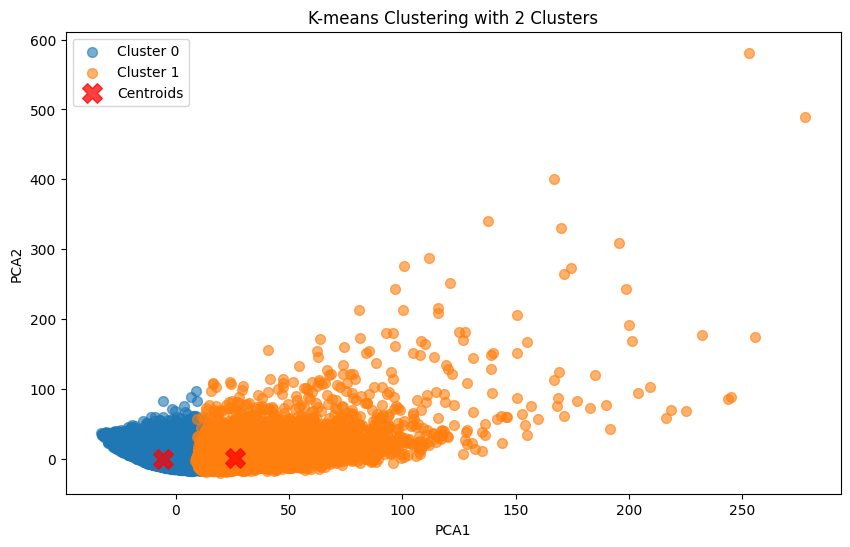

In [ ]:

# Get the cluster labels and centroids
labels = kmeans2.labels_
centroids = kmeans2.cluster_centers_

# Check if the dataframe has more than 2 features and apply PCA if necessary
if new_df.shape[1] > 2:
    pca = PCA(n_components=2)
    df_reduced = pca.fit_transform(new_df)
else:
    df_reduced = new_df.values

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(df_reduced, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the DataFrame
df_reduced['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    subset = df_reduced[df_reduced['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)

# Plotting the centroids
if df.shape[1] > 2:
    centroids_reduced = pca.transform(centroids)
else:
    centroids_reduced = centroids

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering with 2 Clusters')
plt.legend()
plt.show()

In [2]:
from sklearn.cluster import KMeans

In [3]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [6]:
num_rows = int(len(df) * 0.3)
random_indices = np.random.choice(df.index, size=num_rows, replace=False)
shuffled_df = df.loc[random_indices].sample(frac=1).reset_index(drop=True)
new_df = shuffled_df

print(new_df)

           LINEA  VENTASOLES   FLG_CEF    FLG_TC    edad_t  FLG_DEPENDIENTE  \
0      -0.563439   -0.685297 -0.843115  0.843115 -0.730975        -1.646234   
1       0.492044   -0.685297 -0.843115  0.843115 -0.464722         0.607447   
2      -0.352342   -0.485651  1.186077 -1.186077 -0.198468         0.607447   
3      -0.352342    1.464182  1.186077 -1.186077 -0.908478         0.607447   
4       1.709910   -0.685297 -0.843115  0.843115  1.132799         0.607447   
...          ...         ...       ...       ...       ...              ...   
107153 -0.644630   -0.685297 -0.843115  0.843115  1.487804        -1.646234   
107154 -0.352342    0.341457  1.186077 -1.186077 -0.464722         0.607447   
107155 -0.352342    1.596379  1.186077 -1.186077  0.777794         0.607447   
107156 -0.382155   -0.685297 -0.843115  0.843115  1.487804         0.607447   
107157  0.086089   -0.685297 -0.843115  0.843115  2.375315         0.607447   

        DEF_BURO_12  DEF_BURO_6  flg_ayuda  FLG_SEG

In [7]:
kmeans2 = KMeans(n_clusters=2, random_state=42)  # adjust n_clusters and random_state as needed
kmeans2.fit(new_df)

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [10]:
import pickle

In [11]:
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans2, f)

In [12]:
labels = kmeans2.labels_
centroids = kmeans2.cluster_centers_

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.decomposition import PCA

/var/folders/s1/drf1fvkd2f33nh8092bzmkd40000gn/T/ipykernel_4724/3927894718.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


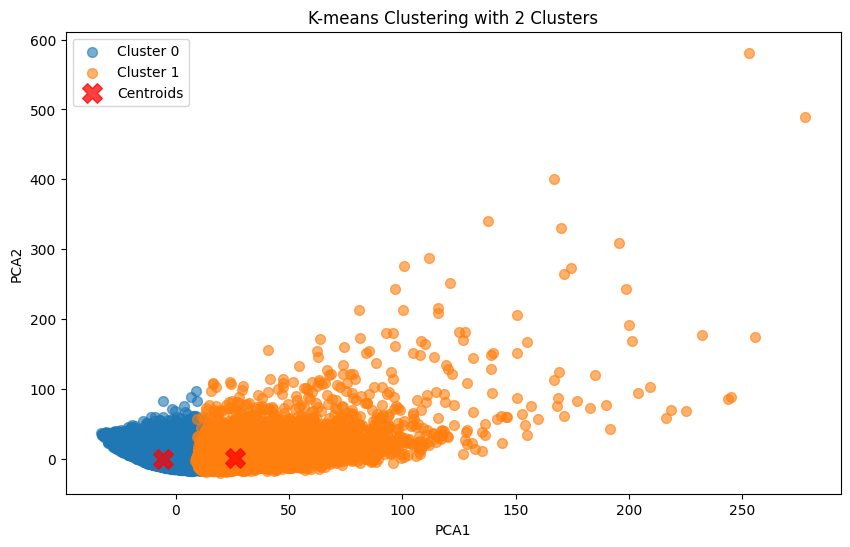

In [19]:

# Get the cluster labels and centroids
labels = kmeans2.labels_
centroids = kmeans2.cluster_centers_

# Check if the dataframe has more than 2 features and apply PCA if necessary
if new_df.shape[1] > 2:
    pca = PCA(n_components=2)
    df_reduced = pca.fit_transform(new_df)
else:
    df_reduced = new_df.values

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(df_reduced, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the DataFrame
df_reduced['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    subset = df_reduced[df_reduced['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)

# Plotting the centroids
if df.shape[1] > 2:
    centroids_reduced = pca.transform(centroids)
else:
    centroids_reduced = centroids

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering with 2 Clusters')
plt.legend()
plt.show()

### Silhoutte

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [9]:
num_rows = int(len(df) * 0.3)
random_indices = np.random.choice(df.index, size=num_rows, replace=False)
shuffled_df = df.loc[random_indices].sample(frac=1).reset_index(drop=True)
new_df = shuffled_df

print(new_df)

           LINEA  VENTASOLES   FLG_CEF    FLG_TC    edad_t  FLG_DEPENDIENTE  \
0      -0.352342   -0.252519  1.186077 -1.186077 -0.553473         0.607447   
1       3.082038   -0.685297 -0.843115  0.843115  0.156536         0.607447   
2      -0.352342    0.125288  1.186077 -1.186077 -0.109717         0.607447   
3      -0.522843   -0.685297 -0.843115  0.843115 -0.198468        -1.646234   
4       5.399225   -0.685297 -0.843115  0.843115 -0.464722         0.607447   
...          ...         ...       ...       ...       ...              ...   
107153  0.362139   -0.685297 -0.843115  0.843115 -1.352233         0.607447   
107154 -0.352342   -0.073939  1.186077 -1.186077 -0.730975        -1.646234   
107155 -0.628391   -0.685297 -0.843115  0.843115  1.576555        -1.646234   
107156 -0.352342   -0.508068  1.186077 -1.186077 -0.287220         0.607447   
107157 -0.522535   -0.685297 -0.843115  0.843115 -0.997229         0.607447   

        DEF_BURO_12  DEF_BURO_6  flg_ayuda  FLG_SEG

In [10]:
X = new_df.values

In [11]:
def find_best_k(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    return silhouette_scores

In [12]:
max_k = 10
silhouette_scores = find_best_k(X, max_k)

best_k = np.argmax(silhouette_scores) + 2
print(f'Best number of clusters: {best_k}')

/Users/lorenabecerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

Best number of clusters: 2


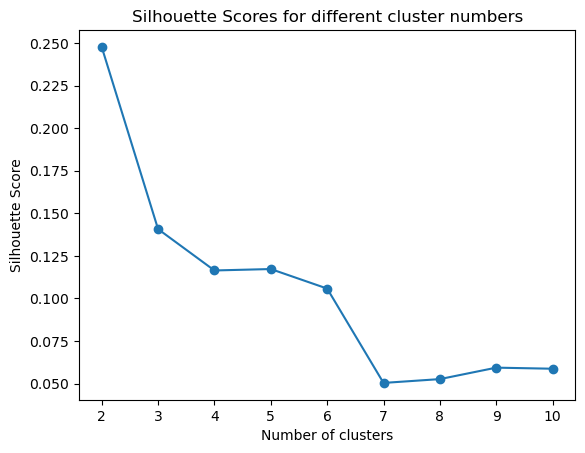

In [15]:
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xticks(range(2, max_k + 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster numbers')
plt.show()

In [13]:
max_k = 10
silhouette_scores = find_best_k(X, max_k)

best_k = np.argmax(silhouette_scores) + 2
print(f'Best number of clusters: {best_k}')

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/

Best number of clusters: 2


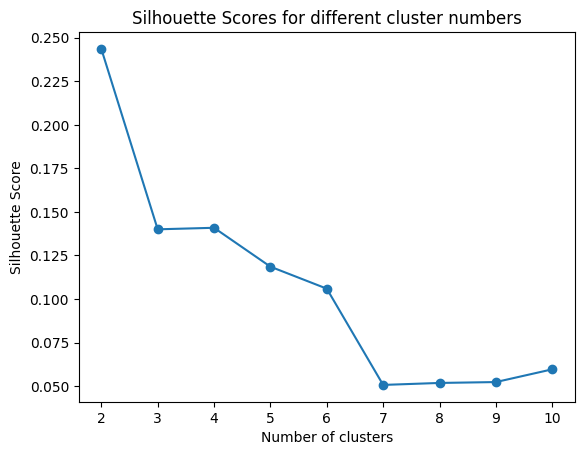

In [16]:
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xticks(range(2, max_k + 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster numbers')
plt.show()

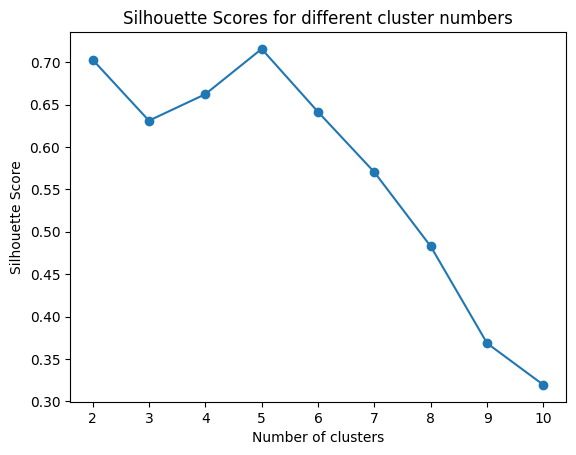

In [31]:
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xticks(range(2, max_k + 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster numbers')
plt.show()

### 4 Cluster 30%

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [4]:
num_rows = int(len(df) * 0.3)
random_indices = np.random.choice(df.index, size=num_rows, replace=False)
shuffled_df = df.loc[random_indices].sample(frac=1).reset_index(drop=True)
new_df = shuffled_df

print(new_df)

           LINEA  VENTASOLES   FLG_CEF    FLG_TC    edad_t  FLG_DEPENDIENTE  \
0       1.271478   -0.685297 -0.843115  0.843115  0.422790         0.607447   
1      -0.628391   -0.685297 -0.843115  0.843115 -0.819727         0.607447   
2       0.897999   -0.685297 -0.843115  0.843115 -0.553473         0.607447   
3      -0.352342   -0.462834  1.186077 -1.186077 -0.198468         0.607447   
4      -0.352342   -0.655763  1.186077 -1.186077 -0.908478         0.607447   
...          ...         ...       ...       ...       ...              ...   
107153 -0.433533   -0.685297 -0.843115  0.843115 -0.730975         0.607447   
107154 -0.514724   -0.685297 -0.843115  0.843115 -1.352233        -1.646234   
107155 -0.628391   -0.685297 -0.843115  0.843115  0.156536        -1.646234   
107156 -0.352342    1.556108  1.186077 -1.186077  1.399052         0.607447   
107157 -0.352342   -0.314525  1.186077 -1.186077 -1.174731         0.607447   

        DEF_BURO_12  DEF_BURO_6  flg_ayuda  FLG_SEG

In [5]:
kmeans4 = KMeans(n_clusters=4, random_state=42)  # adjust n_clusters and random_state as needed
kmeans4.fit(new_df)

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [8]:
import pickle

In [9]:
with open('kmeans41.pkl', 'wb') as f:
    pickle.dump(kmeans4, f)

/var/folders/s1/drf1fvkd2f33nh8092bzmkd40000gn/T/ipykernel_3251/958154054.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)
/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


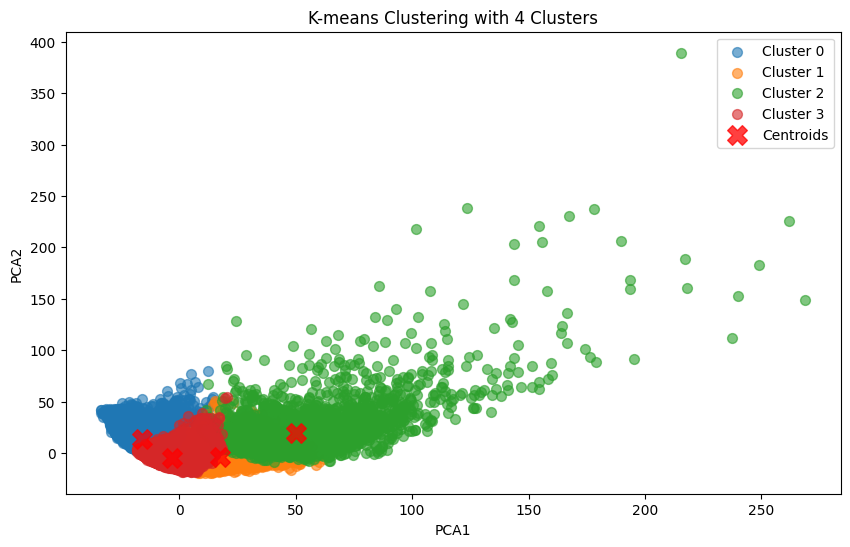

In [11]:
# Get the cluster labels and centroids
labels = kmeans4.labels_
centroids = kmeans4.cluster_centers_

# Check if the dataframe has more than 2 features and apply PCA if necessary
if new_df.shape[1] > 2:
    pca = PCA(n_components=2)
    df_reduced = pca.fit_transform(new_df)
else:
    df_reduced = new_df.values

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(df_reduced, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the DataFrame
df_reduced['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    subset = df_reduced[df_reduced['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)

# Plotting the centroids
if df.shape[1] > 2:
    centroids_reduced = pca.transform(centroids)
else:
    centroids_reduced = centroids

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering with 4 Clusters')
plt.legend()
plt.show()

In [12]:
if new_df.shape[1] > 2:
    feature_importance = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=new_df.columns)
    print("Feature importance for both PCAs:")
    print(feature_importance)

Feature importance for both PCAs:
                            PCA1      PCA2
LINEA                   0.009473  0.004581
VENTASOLES              0.015265  0.005651
FLG_CEF                 0.009273 -0.008061
FLG_TC                 -0.009273  0.008061
edad_t                  0.014185  0.007464
...                          ...       ...
can_ctd_tmo_CD_prm_u12  0.013034  0.005983
ctdpdh12meses           0.001735 -0.002855
ctdpdh24meses           0.003686 -0.004272
id                     -0.018379 -0.005398
FH                      0.034114  0.025392

[2216 rows x 2 columns]


In [13]:
feature_importance.to_csv('kmeans_41_pca_feature_importance.csv', index=True)

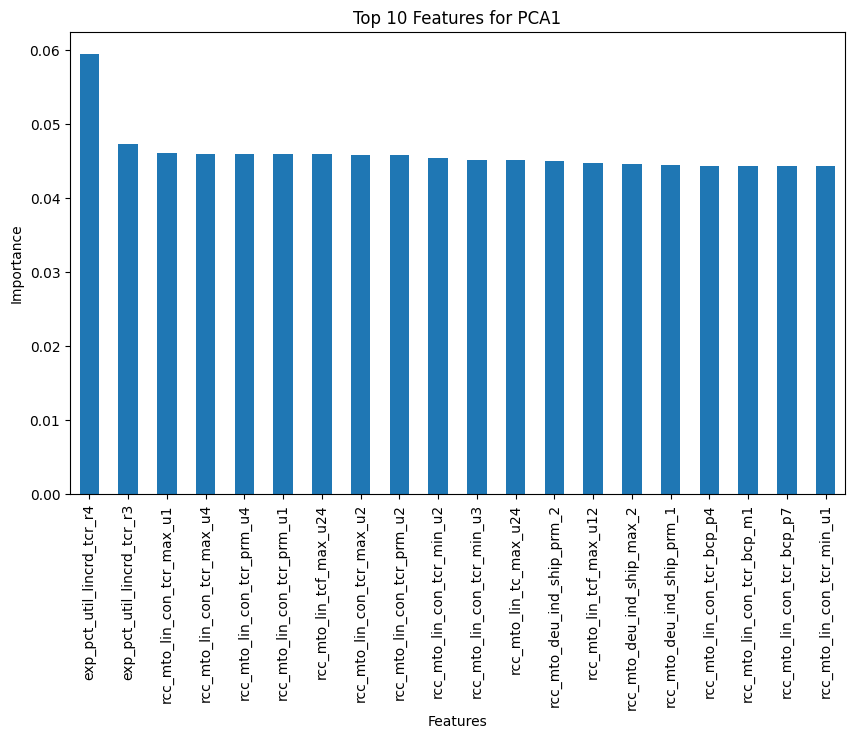

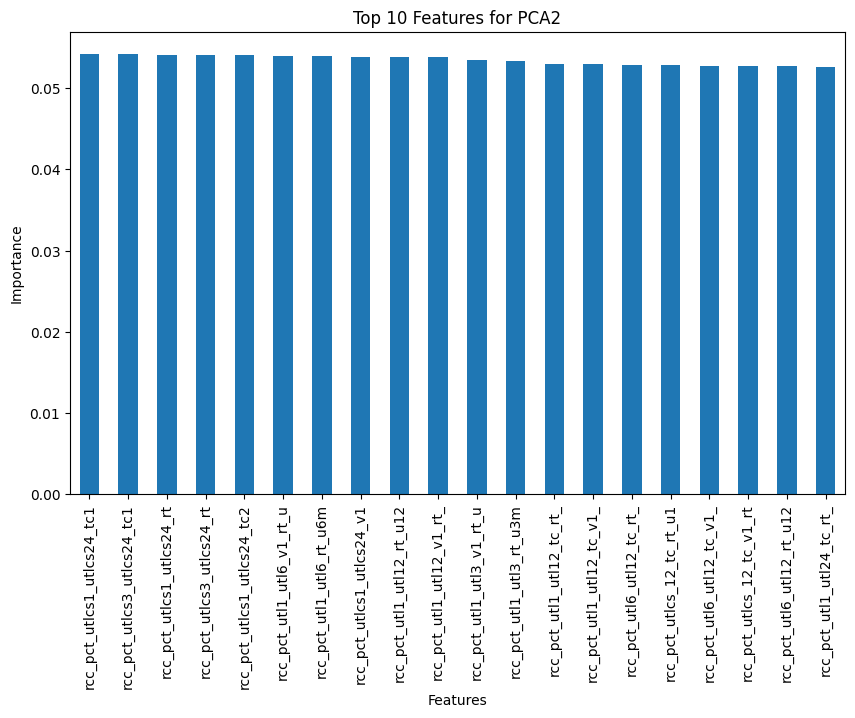

In [17]:
top_20_pca1 = feature_importance['PCA1'].abs().sort_values(ascending=False).head(20)
top_20_pca2 = feature_importance['PCA2'].abs().sort_values(ascending=False).head(20)


plt.figure(figsize=(10, 6))
top_20_pca1.plot(kind='bar')
plt.title('Top 10 Features for PCA1')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

plt.figure(figsize=(10, 6))
top_20_pca2.plot(kind='bar')
plt.title('Top 10 Features for PCA2')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [20]:
top_features = top_20_pca1.index.union(top_20_pca2.index)

<Figure size 1200x800 with 0 Axes>

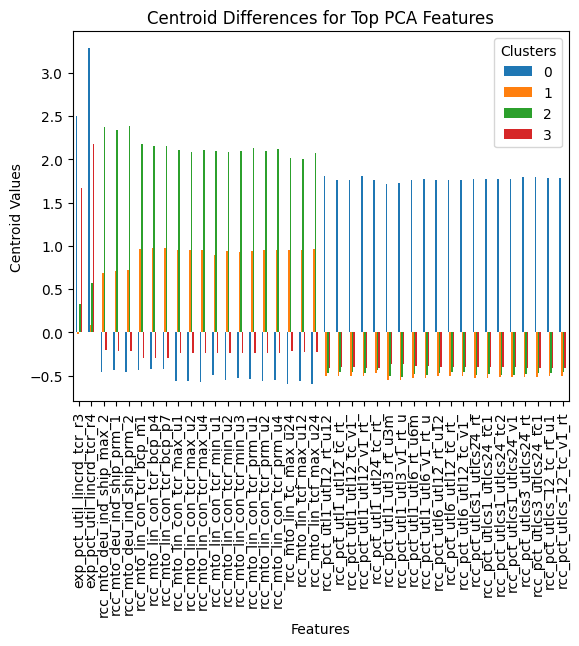

In [21]:
centroids_df = pd.DataFrame(centroids, columns=new_df.columns)
centroids_diff_top_features = centroids_df[top_features].T

plt.figure(figsize=(12, 8))
centroids_diff_top_features.plot(kind='bar')
plt.title('Centroid Differences for Top PCA Features')
plt.xlabel('Features')
plt.ylabel('Centroid Values')
plt.legend(title='Clusters')
plt.show()

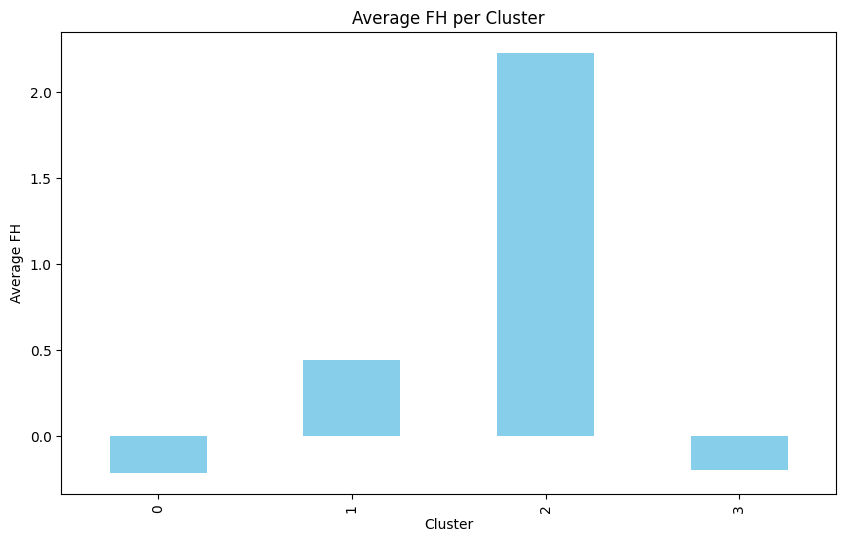

In [22]:
average_fh_per_cluster = new_df.groupby(labels)['FH'].mean()

plt.figure(figsize=(10, 6))
average_fh_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Average FH per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average FH')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_df, labels, test_size=0.3, random_state=42) # min sample leaves deafult 1, 20-100, maximum wheight

In [26]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 6154     1     0    63]
 [    4  5651    45   500]
 [    5   137   926    23]
 [   24   240     6 18369]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6218
           1       0.94      0.91      0.92      6200
           2       0.95      0.85      0.90      1091
           3       0.97      0.99      0.98     18639

    accuracy                           0.97     32148
   macro avg       0.96      0.93      0.95     32148
weighted avg       0.97      0.97      0.97     32148


Accuracy Score:
0.9674007714321264


In [31]:
import seaborn as sns

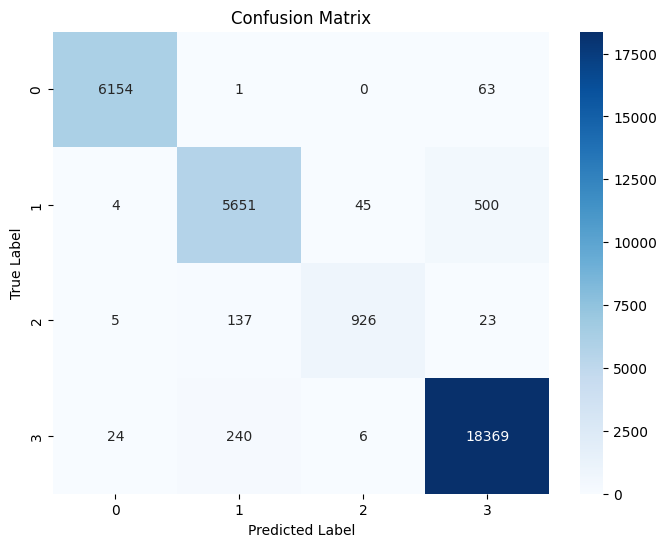

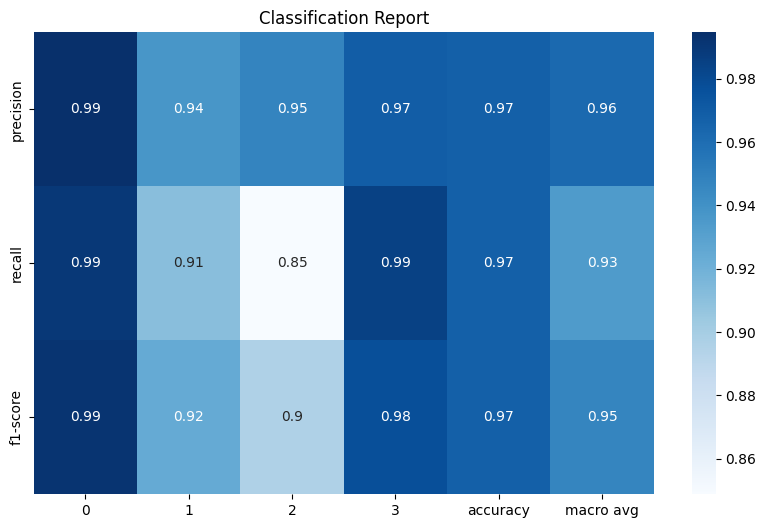

In [32]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot classification report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(classification_df.iloc[:-1, :-1].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

### 4 Cluster

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [36]:
kmeansall = KMeans(n_clusters=4, random_state=42)  # adjust n_clusters and random_state as needed
kmeansall.fit(df)

TypeError: KMeans.fit() got an unexpected keyword argument 'n_jobs'

In [ ]:
# Get the cluster labels and centroids
labels = kmeansall.labels_
centroids = kmeansall.cluster_centers_

# Check if the dataframe has more than 2 features and apply PCA if necessary
if new_df.shape[1] > 2:
    pca = PCA(n_components=2)
    df_reduced = pca.fit_transform(df)
else:
    df_reduced = df.values

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(df_reduced, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the DataFrame
df_reduced['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    subset = df_reduced[df_reduced['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50, cmap='viridis', alpha=0.6)

# Plotting the centroids
if df.shape[1] > 2:
    centroids_reduced = pca.transform(centroids)
else:
    centroids_reduced = centroids

plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering with 2 Clusters')
plt.legend()
plt.show()

## Clustering with Target Variable

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split


In [10]:
df= pd.read_parquet('notnulled.parquet', engine='pyarrow')

In [12]:
num_rows = int(len(df) * 0.3)
random_indices = np.random.choice(df.index, size=num_rows, replace=False)
shuffled_df = df.loc[random_indices].sample(frac=1).reset_index(drop=True)
new_df = shuffled_df

print(new_df)

           LINEA  VENTASOLES   FLG_CEF    FLG_TC    edad_t  FLG_DEPENDIENTE  \
0      -0.352342   -0.562657  1.186077 -1.186077 -0.730975         0.607447   
1      -0.352342    4.876290  1.186077 -1.186077  0.245287         0.607447   
2      -0.652749   -0.685297 -0.843115  0.843115 -1.263482         0.607447   
3      -0.352342   -0.429986  1.186077 -1.186077 -0.287220         0.607447   
4       3.187586    2.307977  1.186077 -1.186077 -0.642224         0.607447   
...          ...         ...       ...       ...       ...              ...   
107153 -0.644630   -0.685297 -0.843115  0.843115 -0.730975         0.607447   
107154 -0.352342   -0.542693  1.186077 -1.186077  1.221550         0.607447   
107155 -0.352342   -0.619699  1.186077 -1.186077 -0.908478         0.607447   
107156 -0.506605   -0.685297 -0.843115  0.843115  0.334038         0.607447   
107157 -0.352342    0.541104  1.186077 -1.186077  0.334038         0.607447   

        DEF_BURO_12  DEF_BURO_6  flg_ayuda  FLG_SEG

In [13]:
X = new_df.drop(columns=['FH'])
y = new_df['FH']

In [14]:
pca = PCA(n_components=50)  # Adjust the number of components based on the explained variance
X_pca = pca.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [16]:
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
kmeans.fit(X_train)

/Users/lorenabecerra/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
kmeans.fit(X_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
silhouette_avg = silhouette_score(X_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Silhouette Score: {silhouette_avg}')

In [ ]:
# Optionally, map cluster labels to target variable labels for better interpretation
# This step is not necessary but can be useful for evaluation
cluster_to_target = {}
for cluster in np.unique(y_pred):
    cluster_indices = np.where(y_pred == cluster)
    corresponding_targets = y_test.iloc[cluster_indices]
    most_common_target = corresponding_targets.value_counts().idxmax()
    cluster_to_target[cluster] = most_common_target

mapped_predictions = [cluster_to_target[cluster] for cluster in y_pred]
final_accuracy = accuracy_score(y_test, mapped_predictions)

print(f'Final Mapped Accuracy: {final_accuracy}')

In [ ]:


# Step 2: Incorporate the target variable into the clustering process
# Split the data to ensure we evaluate the clustering on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Use K-Means for clustering
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
kmeans.fit(X_train)

# Predict clusters for the test set
y_pred = kmeans.predict(X_test)

# Step 3: Evaluate the clustering performance
accuracy = accuracy_score(y_test, y_pred)
silhouette_avg = silhouette_score(X_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Silhouette Score: {silhouette_avg}')

# Optionally, map cluster labels to target variable labels for better interpretation
# This step is not necessary but can be useful for evaluation
cluster_to_target = {}
for cluster in np.unique(y_pred):
    cluster_indices = np.where(y_pred == cluster)
    corresponding_targets = y_test.iloc[cluster_indices]
    most_common_target = corresponding_targets.value_counts().idxmax()
    cluster_to_target[cluster] = most_common_target

mapped_predictions = [cluster_to_target[cluster] for cluster in y_pred]
final_accuracy = accuracy_score(y_test, mapped_predictions)

print(f'Final Mapped Accuracy: {final_accuracy}')